<a href="https://colab.research.google.com/github/iamomtiwari/Diabetic-Prediction/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Diabetes Visualization and Prediction
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

Features:
Gender: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.
Age: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.
Hypertension: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated.
Heart Disease: Heart disease is another medical condition that is associated with an increased risk of developing diabetes.
Smoking History: Smoking history is also considered as a risk factor on Diabetes. It represents smoking history of the patient.
BMI(Body Mass Index): BMI (Body Mass Index) is a measure of body fat based on weight and height. Patients with higher BMI are known for having more risk of suffering from diabetes.
HbA1c Level: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.
Blood Glucose Level: Blood glucose level refers to the amount of glucose in the bloodstream at a given time.
Diabetes: Represents the patient if he/she has diabetes or not. 0 is negative, 1 is positive.


In [ ]:
df = pd.read_csv("/content/diabetes_prediction_dataset[1].csv") #Load the dataset as 'df'.

In [ ]:
df.info() #First look to our data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Variable Description

Gender: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

Age: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

Hypertension: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated.

Heart Disease: Heart disease is another medical condition that is associated with an increased risk of developing diabetes.

Smoking History: Smoking history is also considered as a risk factor on Diabetes. It represents smoking history of the patient.

BMI(Body Mass Index): BMI (Body Mass Index) is a measure of body fat based on weight and height. Patients with higher BMI are known for having more risk of suffering from diabetes.

HbA1c Level: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.

Blood Glucose Level: Blood glucose level refers to the amount of glucose in the bloodstream at a given time.

Diabetes: Represents the patient if he/she has diabetes or not. 0 is negative, 1 is positive.

Our numerical variables are:
Age,
BMI,
HbA1c Level,
Blood Glucose Level,
Age BMI HbA1c Level Blood Glucose Level.

Our categorical variables are:
Gender,
Hypertension,
Heart Disease,
Smoking History,
Diabetes,
Visualization of Categorical Features .

In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
def bar_plot(variable):
    """
        input: variable ex: "Gender"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (5,2))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

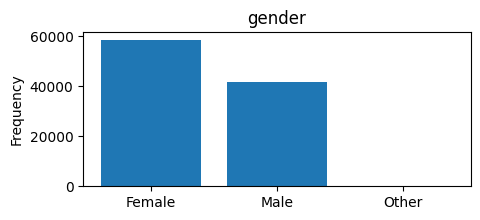

gender: 
 Female    58552
Male      41430
Other        18
Name: gender, dtype: int64


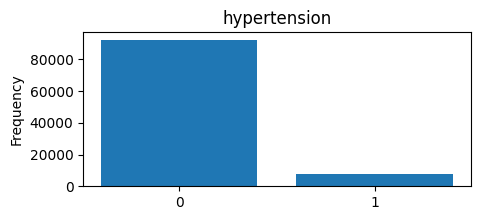

hypertension: 
 0    92515
1     7485
Name: hypertension, dtype: int64


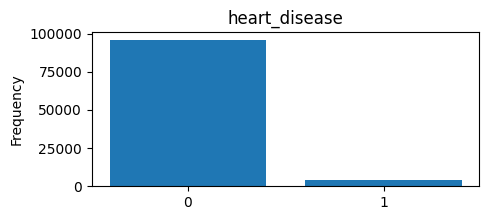

heart_disease: 
 0    96058
1     3942
Name: heart_disease, dtype: int64


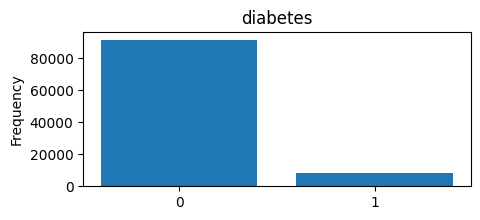

diabetes: 
 0    91500
1     8500
Name: diabetes, dtype: int64


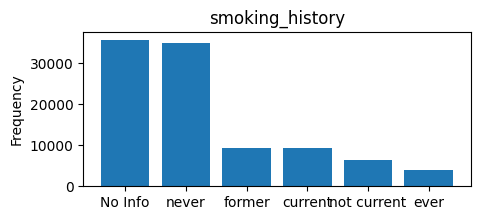

smoking_history: 
 No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


In [ ]:
category1 = ["gender","hypertension","heart_disease","diabetes","smoking_history"]
for c in category1:
    bar_plot(c)

Distribution of Numerical value

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram plot.".format(variable))
    plt.show()

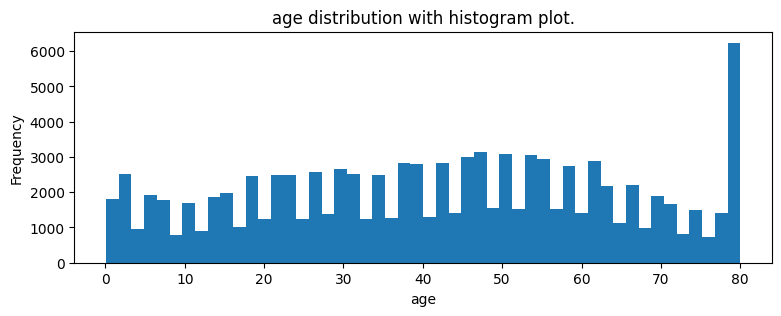

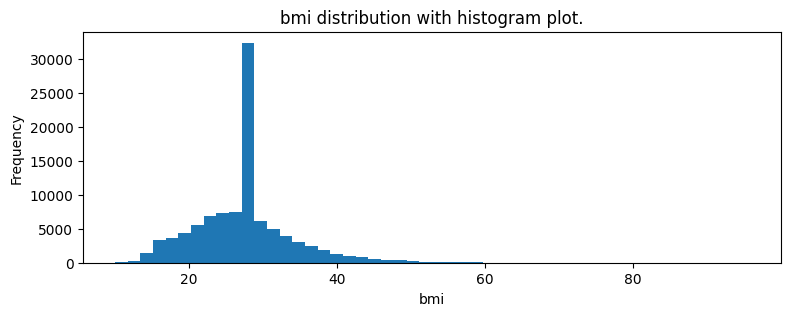

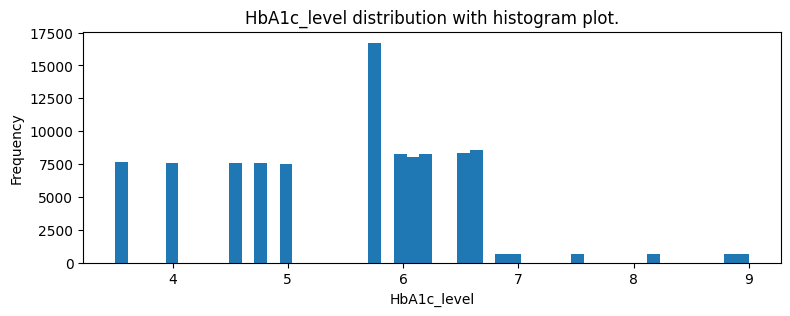

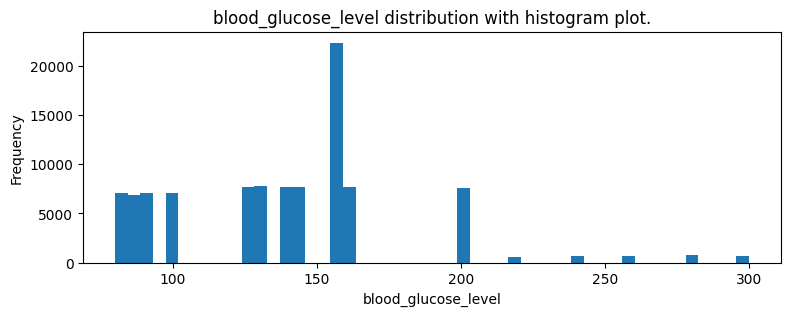

In [ ]:
numericVar = ["age","bmi","HbA1c_level", "blood_glucose_level"]
for n in numericVar:
    plot_hist(n)

data analysis

In [ ]:
# Gender & Diabetes
df[["gender","diabetes"]].groupby(["gender"], as_index = False).mean().sort_values(by="gender",ascending = False)

,gender,diabetes
2,Other,0.000000
1,Male,0.097490
0,Female,0.076189


According to this table, male patients tend to have diabetes more when compared to female patients but the difference is really really low. This means, gender has nothing to do with diabetes according to this data. Noted.

In [ ]:
# Hypertension & Diabetes
df[["hypertension","diabetes"]].groupby(["hypertension"], as_index = False).mean().sort_values(by="hypertension",ascending = False)

,hypertension,diabetes
1,1,0.278958
0,0,0.069308


According to this table, we see that, Hypertension has a low effect on diabetes. It is low but there is an effect on having diabetes by Hyper Tension.

In [ ]:
# Heart Disease & Diabetes
df[["heart_disease","diabetes"]].groupby(["heart_disease"], as_index = False).mean().sort_values(by="heart_disease",ascending = False)

,heart_disease,diabetes
1,1,0.321410
0,0,0.075298


The effect of Heart Disease on Diabetes is almost the same as Hyper tension.

In [ ]:
# Smoking History & Diabetes
df[["smoking_history","diabetes"]].groupby(["smoking_history"], as_index = False).mean().sort_values(by="smoking_history",ascending = False)

,smoking_history,diabetes
5,not current,0.107027
4,never,0.095341
3,former,0.170017
2,ever,0.117882
1,current,0.102089
0,No Info,0.040596


Interesting. At first, I thought smoking would somehow affect diabetes but, our data shows us that it has no affect on diabetes since all kind of smoking history has almost the same affection on diabetes. Also, as you can see, we have a category called 'No Info' on smoking. Noted for future.


Outliers are the entries that way above or way below than the average distribution of the data. We are going to check them with a function, then get rid of them.

In [ ]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [ ]:
df.loc[detect_outliers(df,["age","bmi","HbA1c_level","blood_glucose_level"])]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1135,Female,62.0,1,1,never,43.16,8.8,280,1
1765,Female,25.0,0,0,not current,41.65,9.0,280,1
2622,Female,57.0,1,0,current,45.13,8.8,280,1
5928,Male,65.0,1,0,former,43.41,8.8,300,1
7480,Male,38.0,0,0,current,69.66,8.8,300,1
8793,Male,42.0,0,0,never,49.20,9.0,300,1
11400,Female,64.0,0,0,never,41.92,9.0,260,1
12082,Female,63.0,0,0,not current,41.81,8.8,280,1
12942,Female,62.0,0,0,never,43.49,9.0,300,1
17268,Female,63.0,1,0,current,38.63,8.8,260,1


In [ ]:
#Let's drop them.
df = df.drop(detect_outliers(df,["age","bmi","HbA1c_level","blood_glucose_level"]),axis = 0).reset_index(drop=True)

In [ ]:
df.loc[detect_outliers(df,["age","bmi","HbA1c_level","blood_glucose_level"])] #Check again if we have any outlier values.

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


Now we've gotten rid of all of our outlier values. You don't have to do that, but for a better machine learning model, I advise you to do so.


 Missing Values

We never want missing values in our data. We either get rid of them by simply dropping them or filling them. As I've mentioned before, we do not have any missing or NaN values on our data. But we have a category on smoking history called 'No Information'. I can't fill it with mean or something with numbers since it is a categorical feature. I can not either guess it because it doesn't really seem like we can predict it by other features that are collected in our data. So I am going to leave it as it is.


Data visualization is the process of representing data in a visual format, such as charts, graphs, or maps, to facilitate understanding, analysis, and communication of complex information. It involves transforming raw data into meaningful visual representations that can reveal patterns, trends, and insights that might be difficult to discern from raw numbers alone. By leveraging visual cues like color, shape, and size, data visualization helps to simplify complex data sets, making it easier for individuals to grasp key messages and make data-driven decisions. It plays a crucial role in various fields, including business, science, journalism, and academia, enabling users to explore data, identify correlations, detect anomalies, and present findings in a visually compelling manner. Ultimately, data visualization empowers individuals to unlock the value of data and gain new perspectives on the information they work with.
Let us check the correlation at first. Then we will continue on visualizing with other features.

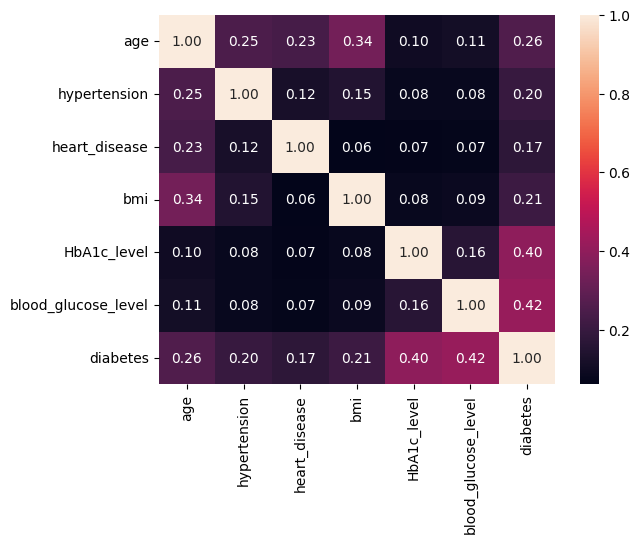

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

Opinions:
As we can see on the heat map, HbA1c Level and Blood Glucose Level is correlated with having diabetes. This might help us track a pattern of our data distribution. In fact, every other feature is correlated with diabetes, but the correlation level is not high like the mentioned features. Let's continue on visualizing.

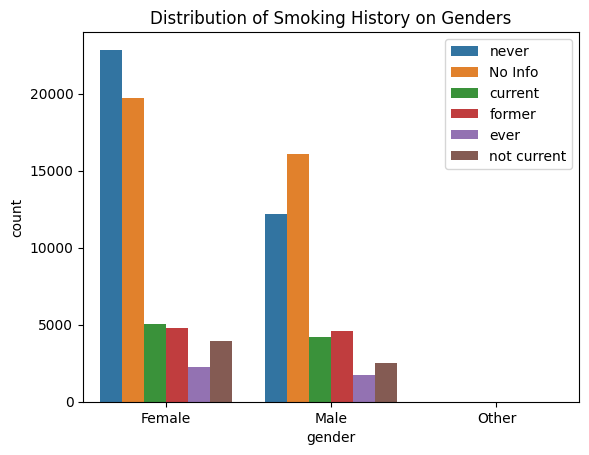

In [ ]:
#Let's check the smoking history on genders.
sns.countplot(x = "gender", data = df, hue = "smoking_history")
plt.legend(loc = "upper right")
plt.title("Distribution of Smoking History on Genders")
plt.show()

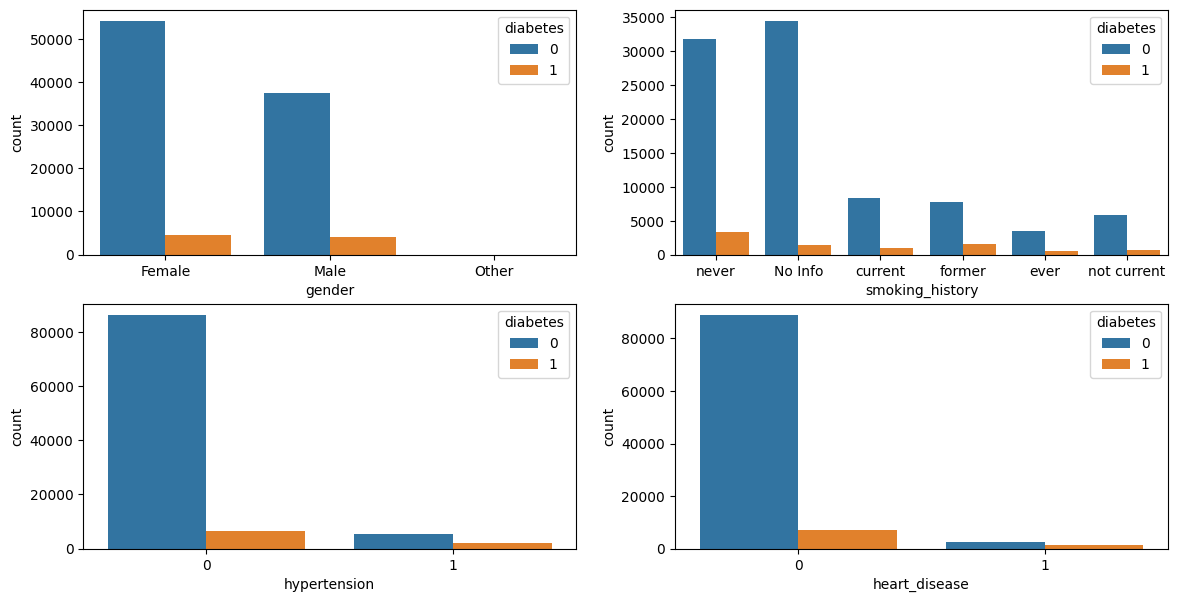

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14,7))

sns.countplot(ax = axes[0,0], data = df, x = "gender", hue = "diabetes")
sns.countplot(ax = axes[0,1], data = df, x = "smoking_history", hue = "diabetes")
sns.countplot(ax = axes[1,0], data = df, x = "hypertension", hue = "diabetes")
sns.countplot(ax = axes[1,1], data = df, x = "heart_disease", hue = "diabetes")
plt.show()

Opinions:

Even though we have more female patients than male patients, we can see that number of patients with diabetes are so close. We can assume that male patients tend to have diabetes more than female patients.
Smoking History still doesn't look like it is going to ring any bells.
Same goes for hyper tension. It doesn't have any affect on diabetes, according to our dataset.
Most of our patients don't have heart disease and only a little count of our patients have heart disease. According to this, it doesn't have any affection on diabetes, as it is seen on the plot.

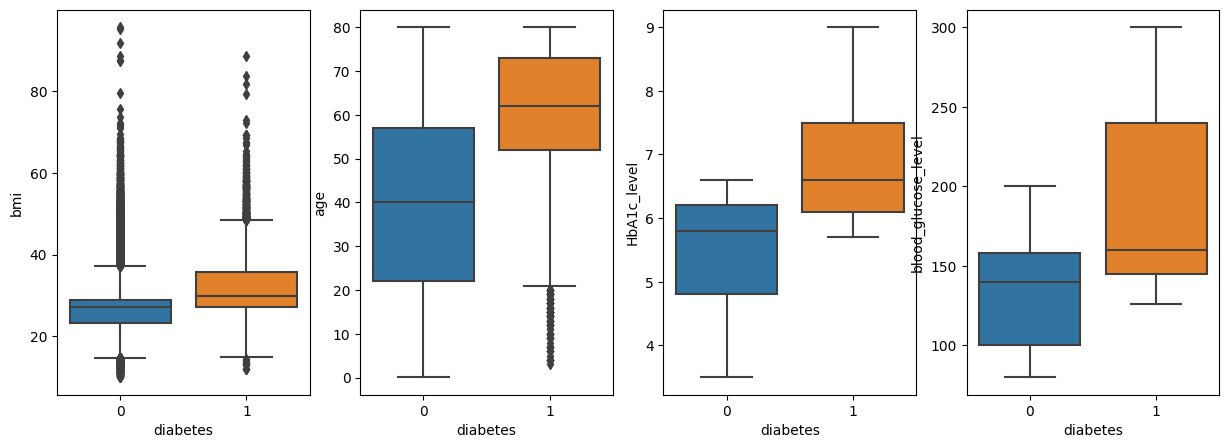

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15,5))
sns.boxplot(ax = axes[0],x = "diabetes", y = "bmi", data = df)
sns.boxplot(ax = axes[1],x = "diabetes", y = "age", data = df)
sns.boxplot(ax = axes[2],x = "diabetes", y = "HbA1c_level", data = df)
sns.boxplot(ax = axes[3],x = "diabetes", y = "blood_glucose_level",data = df)
plt.show()

Opinions:

Great. We can now see the seperation of having diabetes according to the numerical values.

Patients with higher BMI really tend to have diabetes more. But as you can see, there's an intersection.

Same goes for age. Older people tend to have diabetes more than the young people but still, as you can see on the plot, we have outlier values and we also have an intersection here aswell.

HbA1c Level seems to be a good feature for classification since it has no outlier values and the intersection is really small.

Blood Glucose Level is just like HbA1c level. This can also be used for classification as major features.

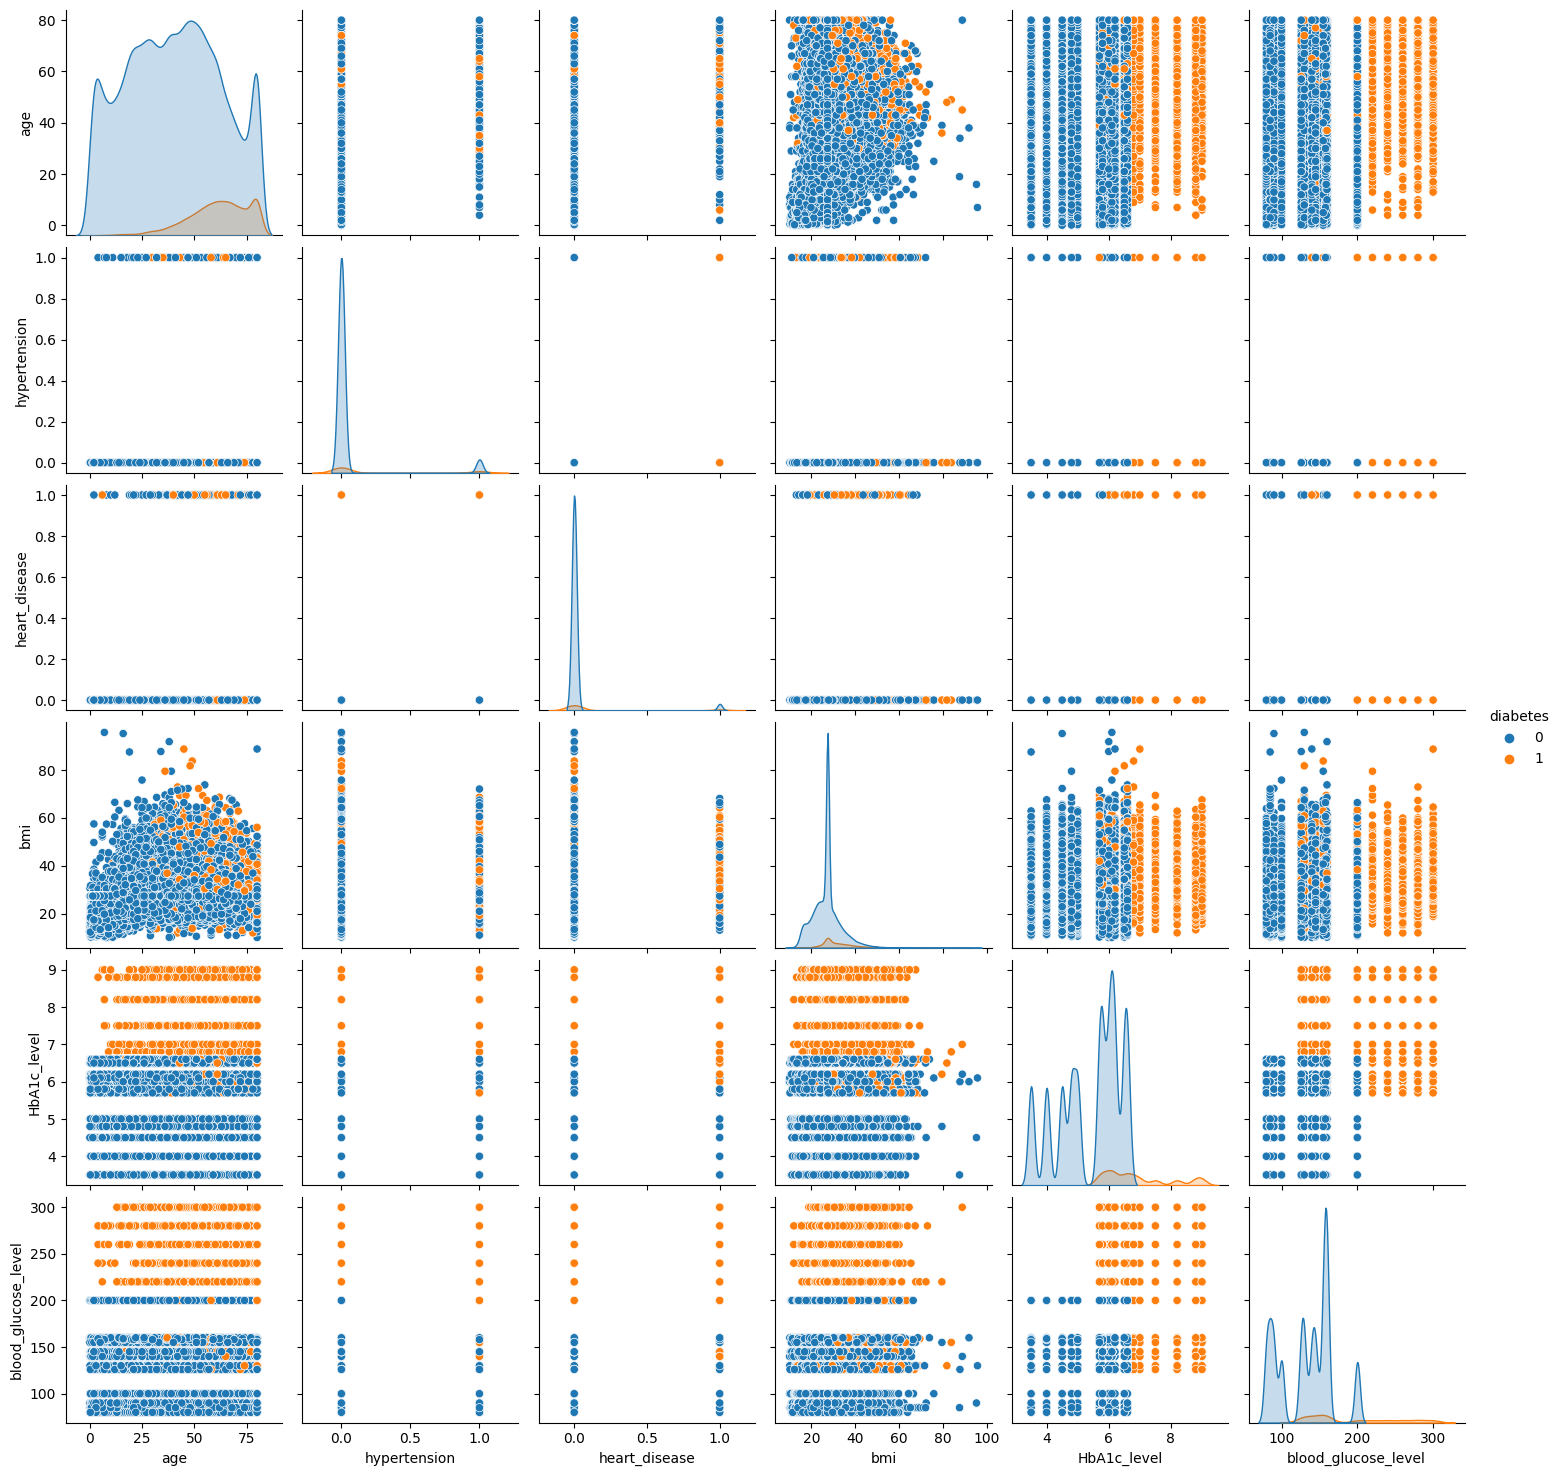

In [ ]:
#Pair plot to see all the distribution.
sns.pairplot(df, hue = "diabetes")
plt.show()

Now we have a better sight on distribution of our data. Blood Glucose Level and Hb1Ac Level is really an indicator of diabetes as seen above.

[]

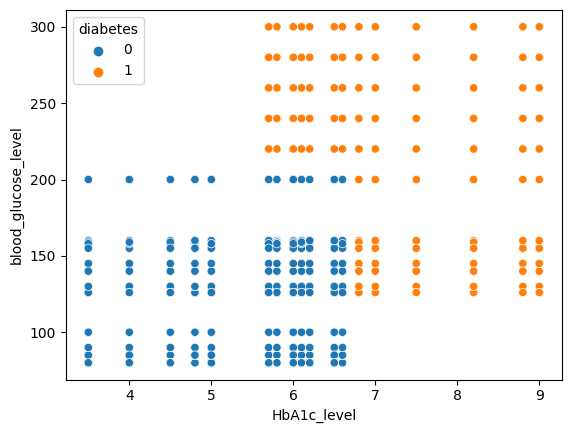

In [ ]:
sns.scatterplot(x = "HbA1c_level", y = "blood_glucose_level", hue = "diabetes", data = df)
plt.plot()

Opinions:
Despite having intersections on HbA1c Level between 7-9 and Blood Glucose Level 200-300, it is clearly seen that we can develop a classification using these two features. The data we have is almost perfectly distributed with these two features. But other features would be irrelevant if we use only these two. So we will use them all while applying the machine learning models. But still, I will add a visualization of a neural network even though I won't code it here.


Feature Engineering

We have to convert categorical features into numerical features.
Why? Machine learning can be done with numbers, only numbers. So basically if you can turn a data into numbers, you can apply Machine Learning on it. Otherwise, you can't. This is why.
How? There are several ways of doing this. Get dummies, label encoder, or list comprehension. I am going to use Label Encoder from Scikit Learn on this notebook.

In [ ]:
#Label encoding the Smoking History feature.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["smoking_history"] = le.fit_transform(df["smoking_history"])

In [ ]:
df["smoking_history"].value_counts()


0    35813
4    35071
3     9344
1     9275
5     6443
2     4002
Name: smoking_history, dtype: int64

In [ ]:
df["gender"] = le.fit_transform(df["gender"])

In [ ]:
df["gender"].value_counts()

0    58519
1    41411
2       18
Name: gender, dtype: int64

Gender:

Female is labeled as 0.

Male is labeled as 1.

Other is labeled as 2.

Opinions:
Our feature engineering is done here since no more engineering needed on this dataset. We can now start applying our ML models on this dataset.

Modeling

We are going to apply few different machine learning models from SKLearn Library. We'll use following:

Logistic Regression,
Random Forest Classifier,
KNeighbors Classifier,
Decission Tree Classifier,
Support Vector Machines(SVM).
We are also going to do hyperparameter tuning for this case to acqurie the best accuracy scores. Let's start.

Before we start, we better normalize our data for better machine learning accuracy. Normalization is basically scaling the numerical values between numbers that are closer to other numbers.

In [ ]:
X_data = df.drop(labels = "diabetes", axis = 1)
y = df["diabetes"]

In [ ]:
#Normalization
x = (X_data - np.min(X_data))/(np.max(X_data)-np.min(X_data))

In [ ]:
#Importing libraries.
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Manuplating our dataset for train and test seperation.
X_train = df.drop(labels = "diabetes", axis = 1)
y_train = df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print("X Train: ",len(X_train))
print("X Test: ",len(X_test))
print("y Train: ",len(y_train))
print("y Test: ",len(y_test))

X Train:  79958
X Test:  19990
y Train:  79958
y Test:  19990


Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2)
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 96.04
Testing Accuracy: % 95.96


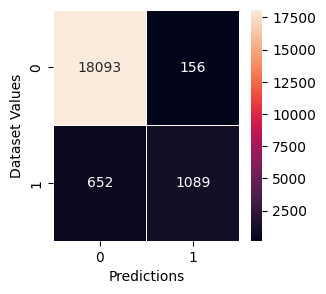

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)
y_true = y_test
cm = confusion_matrix((y_true), y_pred)
f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Score: ",dt.score(X_test,y_test))

Score:  0.952376188094047


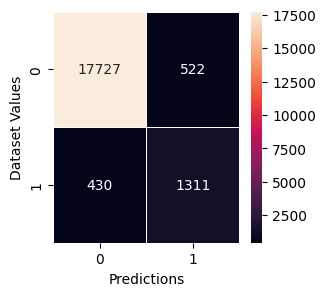

In [ ]:
#Confusion Matrix
y_pred = dt.predict(X_test)
y_true = y_test
cm = confusion_matrix((y_true), y_pred)
f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print("{}NN Score: {} ".format(3,knn.score(X_test,y_test)))

3NN Score: 0.9593296648324162 


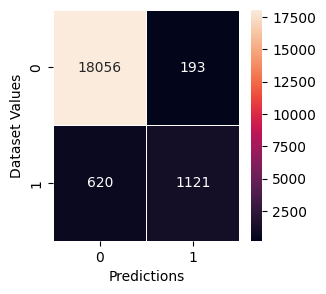

In [ ]:
#Confusion Matrix
y_pred = knn.predict(X_test)
y_true = y_test
cm = confusion_matrix((y_true), y_pred)
f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

In [ ]:
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)
print("Accuracy of SVM Algo: ",svm.score(X_test,y_test))

Accuracy of SVM Algo:  0.9633316658329164


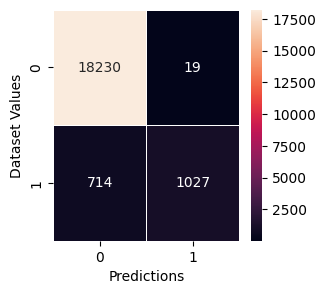

In [ ]:
#Confusion Matrix
y_pred = svm.predict(X_test)
y_true = y_test
cm = confusion_matrix((y_true), y_pred)
f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

We have done a full examination on a dataset related to diabetes.

We have described the features of the dataset.

We have done basic data analysis.

We have detected the outliers with a function that we've coded ourselves and got rid of these outlier values for a better machine learning score.

We have visualized our datas for better inspection and decision.

We have done some feature engineerings for better understanding from the computer and applied them to our dataset.

We have applied 5 different machine learning algorithms on our data and found out the best one for our dataset.

Machine learning is revolutionizing the field of medicine by enabling accurate diagnosis, personalized treatment, predictive analytics, and remote patient monitoring. The integration of machine learning algorithms with healthcare data has the potential to transform healthcare delivery, improving patient outcomes, reducing costs, and advancing medical research. As the field continues to evolve, it is imperative to address ethical considerations and data privacy concerns to harness the full potential of machine learning in medicine. With continued research and collaboration between healthcare professionals and data scientists, machine learning holds the promise of creating a future where healthcare is more precise, accessible, and effective for all.